# Import modules

In [75]:
from IPython.display import display, Markdown
import time
from datetime import timedelta
import pandas as pd
import scipy.interpolate
from scipy import interpolate
from scipy.fftpack import *
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from numpy import unravel_index

## General parameters

In [77]:
np.set_printoptions(threshold=np.inf)
mpl.rcParams['agg.path.chunksize'] = 10000
# Matplotlib settings
legend_size = 8
default_size = 10
tick_size = 18
label_size = 32
title_size = 40

plt.rc('font', size=default_size)       # controls default text sizes
plt.rc('axes', titlesize=label_size)    # fontsize of the axes title
plt.rc('axes', labelsize=label_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=tick_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=tick_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=legend_size)  # legend fontsize
plt.rc('figure', titlesize=title_size)  # fontsize of the figure title

# Input parameters in EGSnrc

In [78]:
K = 3725                          # no. of detectors
SDD = 94.9                        # diamter of scatter ring detector
r = 47.45                         # radius of scatter ring detector
SID = 54.1                        # source to isocenter distance
D = 15                            # CTP401 diameter

# Load intensity per scatter detector and considered scanning circles $C_1$ and $C_2$

### Bound Compton Scattering

In [4]:
# Energy parameter
E_max = 0.12
E_min = E_max/(1+2*E_max/0.511)

# Scatter detectors and both scanning circles
E_f = pd.read_csv('C:/Users/Renniel/CTP401_10^9_E_f.txt')
E_f_array = E_f.to_numpy()

# Scatter detectors corresponding to C_1
E_f_c1 = pd.read_csv('C:/Users/Renniel/CTP401_10^9_E_f_c1.txt')
E_f_c1_array = E_f_c1.to_numpy()

# Scatter detectors corresponding to C_2
E_f_c2 = pd.read_csv('C:/Users/Renniel/CTP401_10^9_E_f_c2.txt')
E_f_c2_array = E_f_c2.to_numpy()

# Scatter detectors corresponding to combined C_1 and C_2
E_f_t_array = np.add(E_f_c1_array,E_f_c2_array)

### Klein-Nishina

In [79]:
# Energy parameter
E_max = 0.12
E_min = E_max/(1+2*E_max/0.511)

# Scatter detectors and both scanning circles
E_f_kn = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f.txt')
E_f_kn_array = E_f_kn.to_numpy()

# Scatter detectors corresponding to C_1
E_f_kn_c1 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_c1.txt')
E_f_kn_c1_array = E_f_kn_c1.to_numpy()

# Scatter detectors corresponding to C_2
E_f_kn_c2 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_c2.txt')
E_f_kn_c2_array = E_f_kn_c2.to_numpy()

# Scatter detectors corresponding to combined C_1 and C_2
E_f_kn_t_array = np.add(E_f_kn_c1_array,E_f_kn_c2_array)

### Klein-Nishina 300keV

In [9]:
# Energy parameter
E_max = 0.3
E_min = E_max/(1+2*E_max/0.511)

# Scatter detectors and both scanning circles
E_f_kn_300 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_300_E_f.txt')
E_f_kn_300_array = E_f_kn_300.to_numpy()

# Scatter detectors corresponding to C_1
E_f_kn_c1_300 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_300_E_f_c1.txt')
E_f_kn_c1_300_array = E_f_kn_c1_300.to_numpy()

# Scatter detectors corresponding to C_2
E_f_kn_c2_300 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_300_E_f_c2.txt')
E_f_kn_c2_300_array = E_f_kn_c2_300.to_numpy()

# Scatter detectors corresponding to combined C_1 and C_2
E_f_kn_t_300_array = np.add(E_f_kn_c1_300_array,E_f_kn_c2_300_array)

### Klein-Nishina with Rayleigh Scattering

In [10]:
# Energy parameter
E_max = 0.12
E_min = E_max/(1+2*E_max/0.511)

# Scatter detectors and both scanning circles
E_f_kn_rayleigh = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_rayleigh.txt')
E_f_kn_array_rayleigh = E_f_kn_rayleigh.to_numpy()

# Scatter detectors corresponding to C_1
E_f_kn_c1_rayleigh = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_c1_rayleigh.txt')
E_f_kn_c1_array_rayleigh = E_f_kn_c1_rayleigh.to_numpy()

# Scatter detectors corresponding to C_2
E_f_kn_c2_rayleigh = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_c2_rayleigh.txt')
E_f_kn_c2_array_rayleigh = E_f_kn_c2_rayleigh.to_numpy()

# Scatter detectors corresponding to combined C_1 and C_2
E_f_kn_t_array_rayleigh = np.add(E_f_kn_c1_array_rayleigh,E_f_kn_c2_array_rayleigh)

In [43]:
# Energy parameter
E_max = 0.12
E_min = E_max/(1+2*E_max/0.511)

# Scatter detectors and both scanning circles
E_f_kn_rayleigh_5 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_rayleigh_5.txt')
E_f_kn_array_rayleigh_5 = E_f_kn_rayleigh_5.to_numpy()

# Scatter detectors corresponding to C_1
E_f_kn_c1_rayleigh_5 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_c1_rayleigh_5.txt')
E_f_kn_c1_array_rayleigh_5 = E_f_kn_c1_rayleigh_5.to_numpy()

# Scatter detectors corresponding to C_2
E_f_kn_c2_rayleigh_5 = pd.read_csv('C:/Users/Renniel/CTP401_CCST_kn_E_f_c2_rayleigh_5.txt')
E_f_kn_c2_array_rayleigh_5 = E_f_kn_c2_rayleigh_5.to_numpy()

# Scatter detectors corresponding to combined C_1 and C_2
E_f_kn_t_array_rayleigh_5 = np.add(E_f_kn_c1_array_rayleigh_5,E_f_kn_c2_array_rayleigh_5)

# Plot of acquired data $n(\alpha_{D_{k,int}},E_{\omega})$

In [71]:
start_time = time.time()

def image_form(array,Vmax):
    fig, ax = plt.subplots(len(array),1,figsize = (10,25),constrained_layout=True)
    x_label = np.linspace(0,360,7)
    for i in range(len(array)):
        im = ax[i].imshow(np.transpose(array[i]), cmap = 'binary', origin = 'lower', \
                     vmin=0,vmax=Vmax,aspect='auto')
        cbar_step = Vmax/6
        cbar_ticks = np.arange(0,Vmax+cbar_step,cbar_step)
        cbar = fig.colorbar(im,ax=ax[i],aspect=10,ticks=cbar_ticks)
        cbar_ticklabel = np.linspace(0,Vmax,len(cbar_ticks))
        cbar.ax.set_yticklabels(np.int_(cbar_ticklabel))
        ax[i].set_ylabel(r'$E_{\omega}$ ($keV$)')
        ymax = len(array[i].T)
        step = ymax/6
        yticks = np.arange(0, ymax+step, step)
        ax[i].set_yticks(yticks)
        ylabels = np.linspace(E_min*1000,E_max*1000,len(yticks))
        ax[i].set_yticklabels(np.round(ylabels,1))
        ax[i].set_xlabel(r'$α_{D_{k,int}}$')
        ax[i].set_xticks((np.round((K/360)*x_label)))
        ax[i].set_xticklabels(np.int_(x_label))
        
    plt.show()
    return True

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


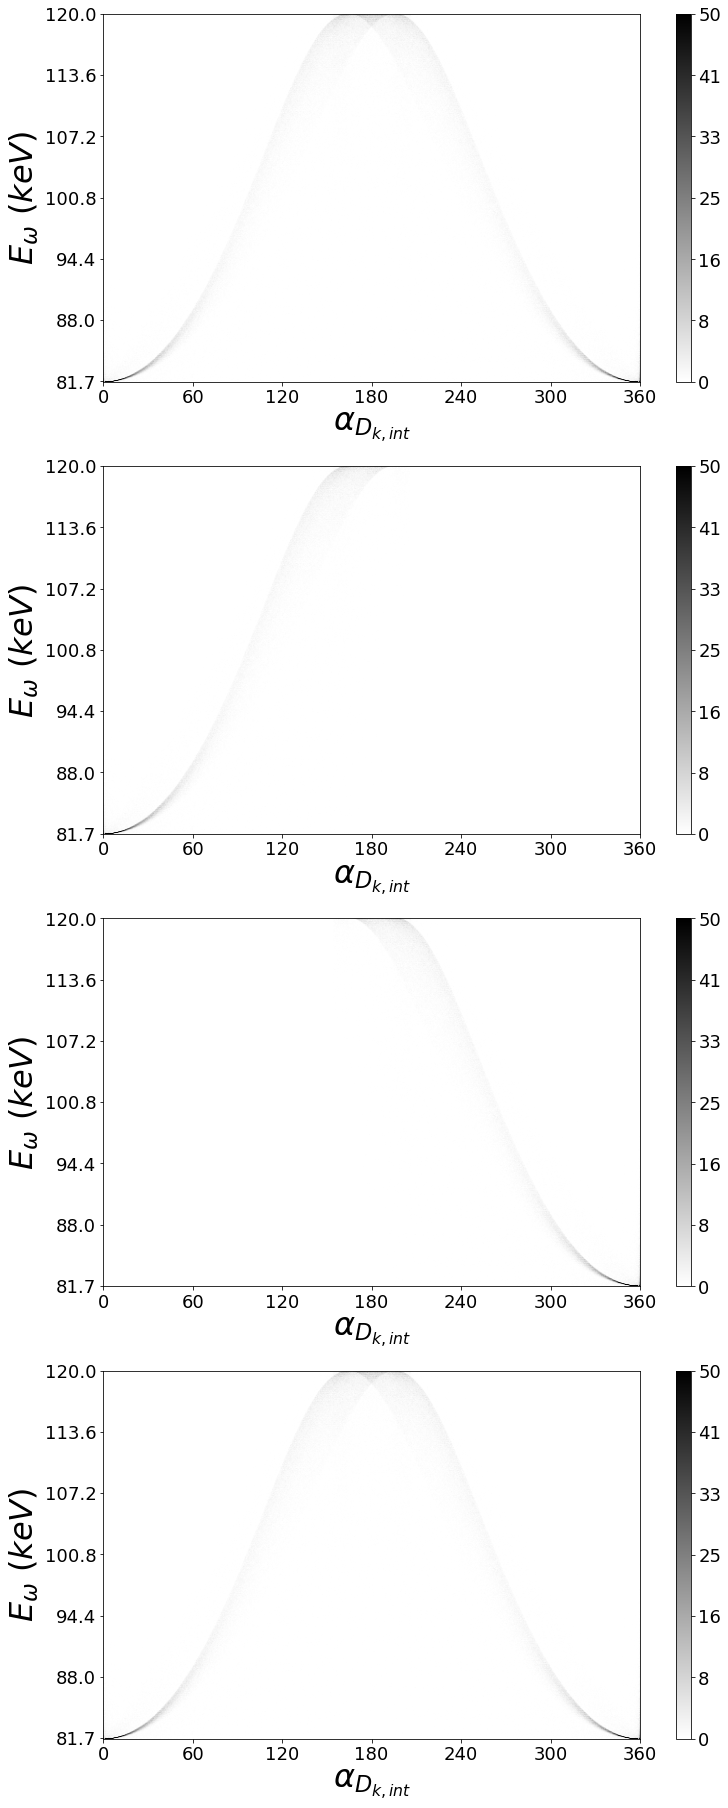

Processing time: 2.374302387237549 s


In [72]:
start_time = time.time()

data_imgform_kn_rayleigh = [E_f_kn_array_rayleigh,E_f_kn_c1_array_rayleigh,E_f_kn_c2_array_rayleigh,E_f_kn_t_array_rayleigh]
imf_kn_rayleigh = image_form(data_imgform_kn_rayleigh,50)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

## Individual plot of acquired data $n(\alpha_{D_{k,int}},E_{\omega})$

In [73]:
start_time = time.time()

def img_form(array,Vmax):
    fig, ax = plt.subplots(figsize = (15,10),constrained_layout=True)
    x_label = np.linspace(0,360,7)
    im = ax.imshow(np.transpose(array), cmap = 'binary', origin = 'lower',aspect='auto', \
                         vmin=0,vmax=Vmax)
    cbar_step = Vmax/6
    cbar_ticks = np.arange(0,Vmax+cbar_step,cbar_step)
    cbar = fig.colorbar(im,ax=ax,aspect=30,ticks=cbar_ticks)
    cbar_ticklabel = np.linspace(0,Vmax,len(cbar_ticks))
    cbar.ax.set_yticklabels(np.int_(cbar_ticklabel))
    ax.set_ylabel(r'$E_{\omega}$ ($keV$)')
    ymax = len(array.T)
    step = ymax/6
    yticks = np.arange(0, ymax+step, step)
    ax.set_yticks(yticks)
    ylabels = np.linspace(E_min*1000,E_max*1000,len(yticks))
    ax.set_yticklabels(np.round(ylabels,1))
    ax.set_xlabel(r'$α_{D_{k,int}}$', fontsize = 32)
    ax.set_xticks((np.round((K/360)*x_label)))
    ax.set_xticklabels(np.int_(x_label),fontsize=18)
    return True

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


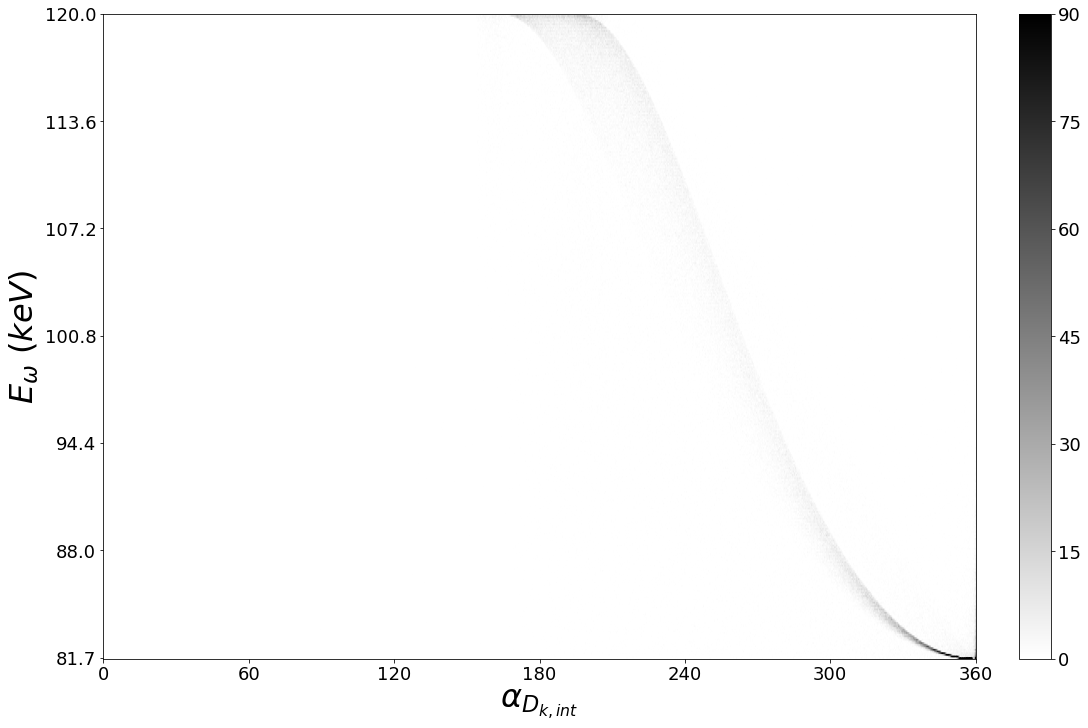

In [74]:
# vmax = E_f_kn_300_array.max()
asd = img_form(E_f_kn_c2_array,90)

# Compute for $\omega$, $\rho$, and $\phi$

In [229]:
start_time = time.time()

def get_omega(energy_step):
    step = 1000/energy_step
    dec = np.floor(np.log10(np.abs(step))).astype(int)
    low = int(np.round(E_min,dec)*step)
    high = int(E_max*step)
    emax = E_max*1000
    omega = []
    for i in range(low,high):
        omega.append(np.arccos(511/emax - 511/(i*energy_step) + 1))
    return omega

omega = get_omega(0.3,0.1)

# original
rho = [[] for k in range(K)]
phi = [[] for k in range(K)]
# for C1
rho1 = rho
phi1 = phi.copy()
# for C2
rho2 = rho
phi2 = phi.copy()
for k in range(K):
    for s in range(len(omega)):
        alpha = np.pi*(1 + (k+1)/(K+1))
        R = SDD*np.cos(alpha + np.pi/2)
        rho[k].append(R/np.sin(omega[s]))
        phi[k].append(alpha + omega[s] - np.pi/2)
        if alpha + omega[s] - np.pi/2 < 2*np.pi:
            phi1[k].append(alpha + omega[s] - np.pi/2)
        if alpha + omega[s] - np.pi/2 > 2*np.pi:
            phi1[k].append(alpha + omega[s] - np.pi/2 - 2*np.pi)
        if alpha - omega[s] - np.pi/2 + np.pi < 2*np.pi:
            phi2[k].append(alpha - omega[s] - np.pi/2 + np.pi)
        if alpha - omega[s] - np.pi/2 + np.pi > 2*np.pi:
            phi2[k].append(alpha - omega[s] - np.pi/2 + np.pi - 2*np.pi)
        
end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 126.77879929542542 s


In [230]:
print(omega)

[3.112103193834308, 3.0626278622339744, 3.0338973540311795, 3.0113691826610816, 2.9922103618436253, 2.975252538262673, 2.9598784458132683, 2.945714800360586, 2.9325154418607675, 2.9201078893377566, 2.9083657241418517, 2.897193009228166, 2.886514893593138, 2.8762716418581116, 2.866414676235757, 2.8569038591343863, 2.847705571807368, 2.8387913213137623, 2.830136708386312, 2.821720648100376, 2.8135247715438423, 2.805532959612313, 2.797730974926031, 2.790106167747731, 2.7826472384901266, 2.7753440440458, 2.768187438443007, 2.7611691406713432, 2.7542816242202997, 2.7475180241236314, 2.7408720582332586, 2.7343379601473456, 2.7279104217506043, 2.721584543734724, 2.7153557927845706, 2.7092199643642565, 2.703173150232948, 2.697211709975705, 2.6913322459588973, 2.6855315812196734, 2.679806739879959, 2.674154929741297, 2.668573526770826, 2.663060061233149, 2.657612205259487, 2.652227761676163, 2.6469046539398433, 2.641640917048397, 2.636434689314185, 2.631284204901803, 2.626187787045195, 2.621143

In [226]:
start_time = time.time()

def get_omega(energy_step):
    step = 1000/energy_step
    dec = np.floor(np.log10(np.abs(step))).astype(int)
    low = int(np.round(E_min,dec)*step)
    high = int(E_max*step)
    emax = E_max*1000
    omega = []
    for i in range(low,high):
        omega.append(np.arccos(511/emax - 511/(i*energy_step) + 1))
    return omega

omega = get_omega(0.12,0.1)

# original
rho = [[] for k in range(K)]
phi = [[] for k in range(K)]
# for C1
rho1 = rho
phi1 = phi.copy()
# for C2
rho2 = rho
phi2 = phi.copy()
for k in range(K):
    for s in range(len(omega)):
        alpha = np.pi*(1 + (k+1)/(K+1))
        R = SDD*np.cos(alpha + np.pi/2)
        rho[k].append(R/np.sin(omega[s]))
        phi[k].append(alpha + omega[s] - np.pi/2)
        if alpha + omega[s] - np.pi/2 < 2*np.pi:
            phi1[k].append(alpha + omega[s] - np.pi/2)
        if alpha + omega[s] - np.pi/2 > 2*np.pi:
            phi1[k].append(alpha + omega[s] - np.pi/2 - 2*np.pi)
        if alpha - omega[s] - np.pi/2 + np.pi < 2*np.pi:
            phi2[k].append(alpha - omega[s] - np.pi/2 + np.pi)
        if alpha - omega[s] - np.pi/2 + np.pi > 2*np.pi:
            phi2[k].append(alpha - omega[s] - np.pi/2 + np.pi - 2*np.pi)
        
end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 22.708608627319336 s


In [227]:
print(max(rho))

[1097.8086434774136, 630.5764233327292, 488.93797740500844, 414.00769839795754, 365.91581840568085, 331.74847282720293, 305.89188998591936, 285.461564486007, 268.80369145124297, 254.89325636427154, 243.056745983974, 232.83100192926804, 223.88567987407146, 215.9780004322061, 208.92501593434517, 202.5859062832107, 196.85028197568806, 191.6302253758446, 186.85473587673278, 182.4657655671822, 178.41533386752096, 174.66339047614272, 171.17620762347258, 167.92515339536556, 164.88574380913693, 162.03690176415773, 159.3603715567722, 156.84025179232626, 154.4626194087915, 152.21522453273568, 150.08724092335294, 148.0690604239574, 146.15212253721708, 144.3287722469647, 142.5921407174238, 140.93604464459978, 139.3549009099473, 137.84365386182174, 136.39771307532453, 135.01289985242946, 133.68540104858465, 132.4117290693833, 131.1886870864718, 130.01333868695602, 128.88298130394483, 127.79512288413288, 126.74746133668796, 125.73786638015049, 124.76436346371048, 123.82511948858976, 122.918430096250

In [223]:
print(max(rho))

[3218.5654400777576, 1203.051309456458, 882.8954932140996, 730.8110617718938, 637.6516917886378, 573.1572839921452, 525.1338754597102, 487.5976630005112, 457.2231472363078, 431.99521405653917, 410.6122562435068, 392.19113366770614, 376.1087280565294, 361.91114314696983, 349.2588723394405, 337.89222501148896, 327.60872159778876, 318.2478502770983, 309.6805101660993, 301.8015282634587, 294.5242456063673, 287.7765287882154, 281.4977835954287, 275.6366862013292, 270.14943668974234, 264.9983985070218, 260.1510269536192, 255.57901684896692, 251.2576182906387, 247.16508268855023, 243.28221074418704, 239.5919809230053, 236.07924201309996, 232.73045710444825, 229.53348912593984, 226.4774201975035, 223.55239867263305, 220.74950899181727, 218.060660433253, 215.47849160197325, 212.9962880924929, 210.60791123052172, 208.30773617431882, 206.0905979569649, 203.9517442932527, 201.88679417148646, 199.8917014105801, 197.962722493978, 196.09638809974845, 194.28947783529185, 192.53899775901198, 190.842160

In [232]:
werwer = []
for i in range(138,300):
    werwer.append(np.arccos(511/300 - 511/i + 1))
    
print(werwer)

[3.112103193834308, 2.9083657241418517, 2.8135247715438423, 2.7408720582332586, 2.679806739879959, 2.626187787045195, 2.5778811449301315, 2.533614510382998, 2.4925563862446305, 2.4541276314180225, 2.4179054965442717, 2.3835700564761546, 2.350872167459978, 2.3196132334305872, 2.289631859502273, 2.260794726127003, 2.232990158112913, 2.206123474808854, 2.180113552854934, 2.1548902357858575, 2.13039234843607, 2.1065661518727548, 2.083364124868149, 2.060743991237769, 2.0386679349295664, 2.0171019603258507, 1.9960153661676683, 1.9753803093303492, 1.955171440345676, 1.9353655967285581, 1.915941543261397, 1.8968797507174981, 1.878162206274551, 1.859772250227554, 1.8416944346627313, 1.8239144005759793, 1.8064187705665904, 1.7891950547504962, 1.772231567947458, 1.7555173565265034, 1.7390421335608282, 1.7227962211606354, 1.7067704990301784, 1.6909563584415936, 1.6753456609390476, 1.659930701187239, 1.6447041734621537, 1.6296591413522767, 1.6147890102975975, 1.6000875026437515, 1.5855486349309864,

# Convert to 1-D array

In [16]:
start_time = time.time()

def flatten(array):
    lst = [] 
    for a in range(len(array)):
        for b in range(len(array[a])):
            lst.append(array[a][b])
    return lst

def flatten_combined(a,b):
    lst = []
    for i in range(len(a)):
        lst.append(a[i])
        lst.append(b[i])
    return lst

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


## Data, $C_1$, $C_2$, combined $C_1$ and $C_2$

In [161]:
start_time = time.time()

# Data
Rho = flatten(rho)
Phi = np.asarray(flatten(phi))*180/np.pi
# N = flatten(E_f_array)
N_kn = flatten(E_f_kn_array)
# N_kn_300 = flatten(E_f_kn_300_array)
# N_kn_rayleigh = flatten(E_f_kn_array_rayleigh)

# C1
Rho1 = flatten(rho1)
Phi1 = np.asarray(flatten(phi1))*180/np.pi
# N1 = flatten(E_f_c1_array)
N1_kn = flatten(E_f_kn_c1_array)
# N1_kn_300 = flatten(E_f_kn_c1_300_array)
# N1_kn_rayleigh = flatten(E_f_kn_c1_array_rayleigh)

# C2
Rho2 = flatten(rho2)
Phi2 = np.asarray(flatten(phi2))*180/np.pi
# N2 = flatten(E_f_c2_array)
N2_kn = flatten(E_f_kn_c2_array)
# N2_kn_300 = flatten(E_f_kn_c2_300_array)
# N2_kn_rayleigh = flatten(E_f_kn_c2_array_rayleigh)

# Combined
Rho_t = flatten_combined(Rho1,Rho2)
Phi_t = flatten_combined(Phi1,Phi2)
# N_t = flatten_combined(N1,N2)
N_kn_t = flatten_combined(N1_kn,N2_kn)
# N_kn_t_300 = flatten_combined(N1_kn_300,N2_kn_300)
# N_kn_t_rayleigh = flatten_combined(N1_kn_rayleigh,N2_kn_rayleigh)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 3.622437000274658 s


# Scatter plot of $n(\rho,\phi)$

In [16]:
start_time = time.time()

Rho_lst = [Rho,Rho1,Rho2,Rho_t]
Phi_lst = [Phi,Phi1,Phi2,Phi_t]

def scatter_plot(n_lst):
    fig, ax = plt.subplots(len(Rho_lst),1,figsize=(10,40),constrained_layout=True)
    for i in range(len(N_lst)):  
        ax[i].set_ylabel(r'$\rho$ ($cm$)',fontsize=12)
        ax[i].set_xlabel('$\phi$ ($degree$)',fontsize=12)

        # scatter with colormap mapping to z value
        im = ax[i].scatter(Phi_lst[i],Rho_lst[i], c= n_lst[i], s = 20, marker = '.', cmap = 'binary')
        ax[i].set_xticks(np.arange(0,max(Phi_lst[i]),100))
        ax[i].set_yticks(np.arange(min(Rho_lst[i]),max(Rho_lst[i]),100))
        fig.colorbar(im,ax=ax[i],aspect=5)
        im.set_clim(min(n_lst[i]),max(n_lst[i]))

    plt.show()
    
    return True

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


### Bound Compton Scattering

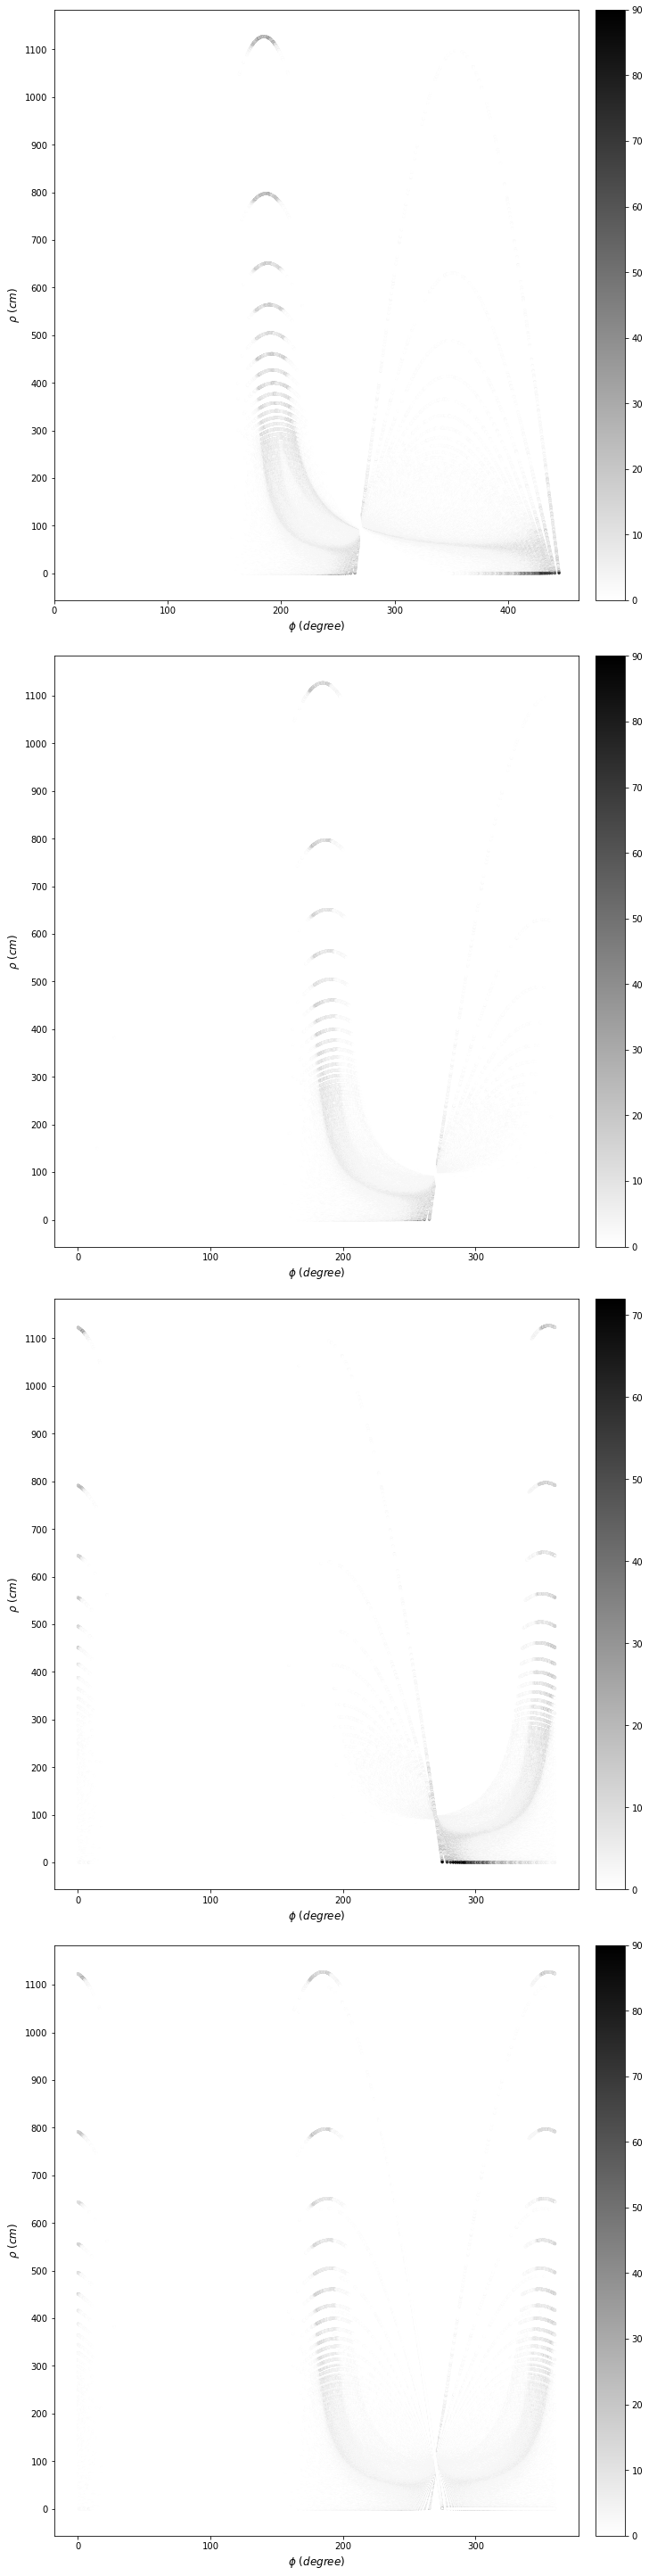

Processing time: 229.31049251556396 s


In [17]:
start_time = time.time()

N_lst = [N,N1,N2,N_t]
sct_img_bc = scatter_plot(N_lst)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina

In [ ]:
start_time = time.time()

N_kn_lst = [N_kn,N1_kn,N2_kn,N_kn_t]
sct_img_kn = scatter_plot(N_kn_lst)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina with Rayleigh Scattering

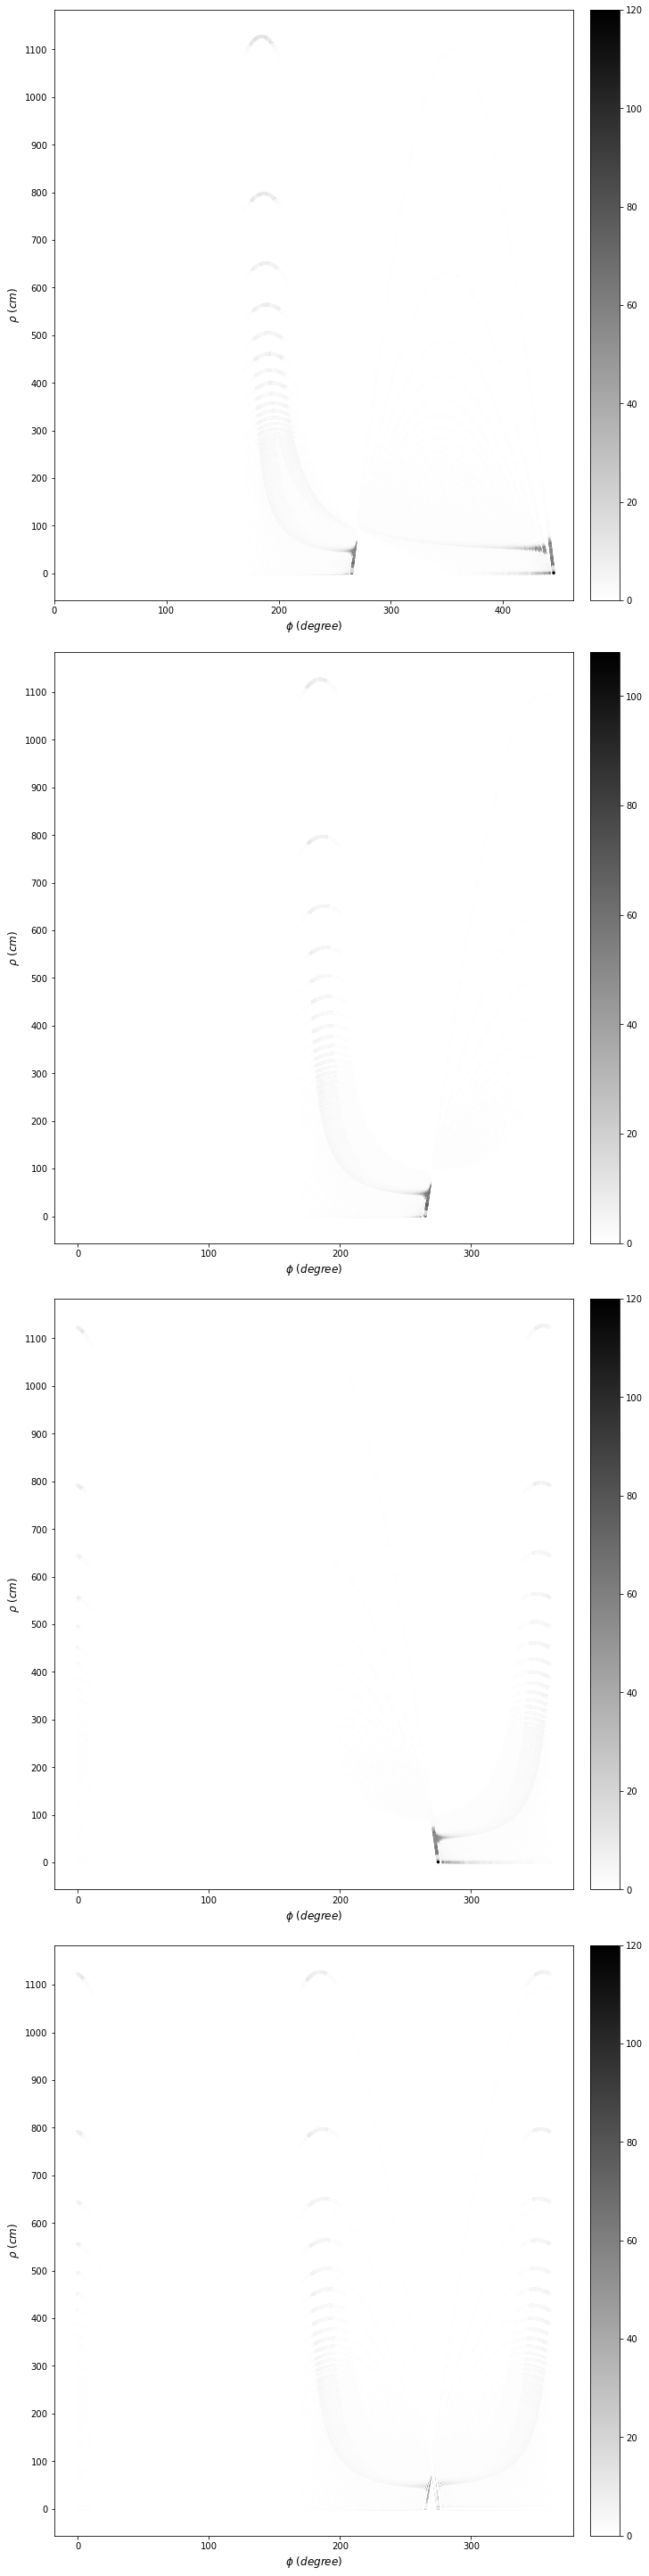

Processing time: 232.31230878829956 s


In [22]:
start_time = time.time()

N_kn_rayleigh_lst = [N_kn_rayleigh,N1_kn_rayleigh,N2_kn_rayleigh,N_kn_t_rayleigh]
sct_img_kn_rayleigh = scatter_plot(N_kn_rayleigh_lst)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

# Compile into dataframe

### Bound Compton Scattering

In [ ]:
start_time = time.time()

# N rows by 3 columns
lst_tuples = list(zip(Phi_t,Rho_t,N_t))
df = pd.DataFrame(lst_tuples,columns=['$\phi$','$\rho$','N'])
df.to_csv('C:/Users/Renniel/CCST_raw.txt', index = False)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina

In [ ]:
start_time = time.time()

# N rows by 3 columns
lst_tuples_kn = list(zip(Phi_t,Rho_t,N_kn_t))
df_kn = pd.DataFrame(lst_tuples_kn,columns=['$\phi$','$\rho$','N'])
df_kn.to_csv('C:/Users/Renniel/CCST_kn_raw.txt', index = False)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina 300keV

In [162]:
start_time = time.time()

# N rows by 3 columns
lst_tuples_kn_300 = list(zip(Phi_t,Rho_t,N_kn_t_300))
df_kn_300 = pd.DataFrame(lst_tuples_kn_300,columns=['$\phi$','$\rho$','N'])
df_kn_300.to_csv('C:/Users/Renniel/CCST_kn_300_raw.txt', index = False)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 9.544013738632202 s


### Klein-Nishina with Rayleigh Scattering

In [24]:
start_time = time.time()

# N rows by 3 columns
lst_tuples_kn_rayleigh = list(zip(Phi_t,Rho_t,N_kn_t_rayleigh))
df_kn = pd.DataFrame(lst_tuples_kn_rayleigh,columns=['$\phi$','$\rho$','N'])
df_kn.to_csv('C:/Users/Renniel/CCST_kn_rayleigh_raw.txt', index = False)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 20.673810243606567 s


# -----------------------------------------------------------------------------------------------------------

# Load csv

### Bound Compton Scattering

In [ ]:
start_time = time.time()

# Energy parameter
E_max = 0.12
E_min = E_max/(1+2*E_max/0.511)

# N rows by 3 columns
df = pd.read_csv('C:/Users/Renniel/CCST_raw.txt')

# Clip data at $\rho$ < 400
df_copy = df.copy()
df_clipped = df_copy[df_copy['$\rho$']<400]

# Discretize rho and phi columns
phi_max = df.T.iloc[0].max()
nx = int(np.round(phi_max,0))
rho_max = df.T.iloc[1].max()
ny = int(np.round(rho_max,0))
rho_max_copy = df_clipped.T.iloc[1].max()
Ny = int(np.round(rho_max_copy,0))

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina

In [3]:
start_time = time.time()

# Energy parameter
E_max = 0.12
E_min = E_max/(1+2*E_max/0.511)

# N rows by 3 columns
df_kn = pd.read_csv('C:/Users/Renniel/CCST_kn_raw.txt')

# Clip data at $\rho$ < 400
df_kn_copy = df_kn.copy()
df_kn_clipped = df_kn_copy[df_kn_copy['$\rho$']<400]

# Discretize rho and phi columns
phi_kn_max = df_kn.T.iloc[0].max()
nx_kn = int(np.round(phi_kn_max,0))
rho_kn_max = df_kn.T.iloc[1].max()
ny_kn = int(np.round(rho_kn_max,0))
rho_kn_max_copy = df_kn_clipped.T.iloc[1].max()
Ny_kn = int(np.round(rho_kn_max_copy,0))

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 2.6361501216888428 s


### Klein-Nishina 300keV

In [122]:
start_time = time.time()

# Energy parameter
E_max = 0.3
E_min = E_max/(1+2*E_max/0.511)

# N rows by 3 columns
df_kn_300 = pd.read_csv('C:/Users/Renniel/CCST_kn_300_raw.txt')

# Clip data at $\rho$ < 400
df_kn_300_copy = df_kn.copy()
df_kn_300_clipped = df_kn_300_copy[df_kn_300_copy['$\rho$']<400]

# Discretize rho and phi columns
phi_kn_300_max = df_kn_300.T.iloc[0].max()
nx_kn_300 = int(np.round(phi_kn_300_max,0))
rho_kn_300_max = df_kn_300.T.iloc[1].max()
ny_kn_300 = int(np.round(rho_kn_300_max,0))
rho_kn_300_max_copy = df_kn_300_clipped.T.iloc[1].max()
Ny_kn_300 = int(np.round(rho_kn_300_max_copy,0))

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 1.21791410446167 s


In [176]:
df_kn_300.isnull().values.any()

False

### Klein-Nishina with Rayleigh Scattering

In [5]:
start_time = time.time()

# Energy parameter
E_max = 0.12
E_min = E_max/(1+2*E_max/0.511)

# N rows by 3 columns
df_kn_rayleigh = pd.read_csv('C:/Users/Renniel/CCST_kn_rayleigh_raw.txt')

# Clip data at $\rho$ < 400
df_kn_rayleigh_copy = df_kn_rayleigh.copy()
df_kn_rayleigh_clipped = df_kn_rayleigh_copy[df_kn_rayleigh_copy['$\rho$']<400]

# Discretize rho and phi columns
phi_kn_rayleigh_max = df_kn_rayleigh.T.iloc[0].max()
nx_kn_rayleigh = int(np.round(phi_kn_rayleigh_max,0))
rho_kn_rayleigh_max = df_kn_rayleigh.T.iloc[1].max()
ny_kn_rayleigh = int(np.round(rho_kn_rayleigh_max,0))
rho_kn_rayleigh_max_copy = df_kn_rayleigh_clipped.T.iloc[1].max()
Ny_kn_rayleigh = int(np.round(rho_kn_rayleigh_max_copy,0))

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 2.6311662197113037 s


# Structured 2D-array using bins with interpolation

In [106]:
start_time = time.time()

def interp_2d(df,NX,NY):
    
    df_copy = df.copy()
    x = df_copy.T.iloc[0] #phi
    y = df_copy.T.iloc[1] #rho
    z = df_copy.T.iloc[2] #N
    # Bin the data onto a (nx x ny) grid
    gridx = np.arange(NX+1)
    gridy = np.arange(NY+1)
    # Have to reverse x & y due to row-first indexing
    zi, yi, xi = np.histogram2d(y, x, bins=[gridy,gridx], weights=z, normed=False)  # add all points inside 
    zi = np.ma.masked_equal(zi, 0)                                                  # a cell of nx x ny grid
    
    # Averaging bins of 2d grid
    zi_avg = zi.copy()
    counts, _, _ = np.histogram2d(y, x, bins=[gridy,gridx])
    
    # Convert zi to pandas to replace -- with zeros
    zi_df = pd.DataFrame(zi)
    zi_df_avg = pd.DataFrame(zi_avg)
    counts_df = pd.DataFrame(counts)
    zi_df = zi_df.replace(np.nan,0)
    zi_df_avg = zi_df_avg.replace(np.nan,0)
    counts_df = counts_df.replace(np.nan,0)
    
    # Convert back to 2d numpy array
    zi = zi_df.to_numpy()
    zi_avg = zi_df_avg.to_numpy()
    counts = counts_df.to_numpy()
    
    # Cumulative
    X = np.arange(0, zi.shape[1])
    Y = np.arange(0, zi.shape[0])
    #mask invalid values
    zi = np.ma.masked_invalid(zi)
    #create meshgrid
    xx, yy = np.meshgrid(X, Y)
    #get only the valid values
    x1 = xx[~zi.mask]
    y1 = yy[~zi.mask]
    newarr = zi[~zi.mask]
    
    # Average
    zi_avg = zi_avg / counts.clip(1)               # get mean of points inside cell
    #mask invalid values
    zi_avg = np.ma.masked_invalid(zi_avg)
    #create meshgrid
    X_avg = np.arange(0, zi_avg.shape[1])
    Y_avg = np.arange(0, zi_avg.shape[0])
    xx_avg, yy_avg = np.meshgrid(X_avg, Y_avg)
    #get only the valid values
    x2 = xx_avg[~zi_avg.mask]
    y2 = yy_avg[~zi_avg.mask]
    newarr_avg = zi_avg[~zi_avg.mask]

    znew = interpolate.griddata((x1, y1), newarr.ravel(),(xx, yy),method='cubic')
    znew_avg = interpolate.griddata((x2, y2), newarr_avg.ravel(),(xx_avg, yy_avg),method='cubic')
    
    fig, ax = plt.subplots(1,2,figsize=(20,10),constrained_layout=True)
#     fig.suptitle(r'Rearranged Acquired Data $n(\rho,\phi)$')
    
    step = zi.shape[1]/6
    xticks = np.arange(0,zi.shape[1]+step,step)
    xlabels = np.linspace(0,360,len(xticks))


    im1 = ax[0].imshow(znew, origin='lower', interpolation='bicubic', aspect='auto',\
                   extent=[0, znew.shape[1], 0, znew.shape[0]],\
                   vmin = z.min(), vmax = z.max(),cmap='binary')
    ax[0].set_title("cumulative bins")
    ax[0].set_xticks(xticks)
    ax[0].set_xticklabels(np.int_(xlabels))
    ax[0].set_xlabel(r"$\phi$, ($degree$)",fontsize=24)
    ax[0].set_ylabel(r"$\rho$, ($cm$)",fontsize=24)
    fig.colorbar(im1,ax=ax[0],aspect=25)
    
    im2 = ax[1].imshow(znew_avg, origin='lower', interpolation='bicubic', aspect='auto',\
                   extent=[0, znew_avg.shape[1], 0, znew_avg.shape[0]],\
                   vmin = z.min(), vmax = z.max(),cmap='binary')
    ax[1].set_title("average bins")
    ax[1].set_xticks(xticks)
    ax[1].set_xticklabels(np.int_(xlabels))
    ax[1].set_xlabel(r"$\phi$, ($degree$)",fontsize=24)
    ax[1].set_ylabel(r"$\rho$, ($cm$)",fontsize=24)
    fig.colorbar(im2,ax=ax[1],aspect=25)
    
    # Save imshow interpolation result as numpy array
    arr1 = im1.get_array()
    arr2 = im2.get_array()
    
#     # Annotate max. value with dot
#     max_idx = arr.argmax()
#     idx = unravel_index(max_idx,arr.shape)
#     ax.plot(idx[1],idx[0],'ro',markersize=15)
    
    return arr1,arr2

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


## Only cumulative bins

In [103]:
start_time = time.time()

def rearrange(df,NX,NY,Vmax):
    df_copy = df.copy()
    x = df_copy.T.iloc[0] #phi
    y = df_copy.T.iloc[1] #rho
    z = df_copy.T.iloc[2] #N
    # Bin the data onto a (nx x ny) grid
    gridx = np.arange(NX+1)
    gridy = np.arange(NY+1)
    # Have to reverse x & y due to row-first indexing
    zi, yi, xi = np.histogram2d(y, x, bins=[gridy,gridx], weights=z, normed=False)  # add all points inside 
    zi = np.ma.masked_equal(zi, 0)                                                  # a cell of nx x ny grid

    # Convert zi to pandas to replace -- with zeros
    zi_df = pd.DataFrame(zi)
    zi_df = zi_df.replace(np.nan,0)

    # Convert back to 2d numpy array
    zi = zi_df.to_numpy()

    # Cumulative
    X = np.arange(0, zi.shape[1])
    Y = np.arange(0, zi.shape[0])
    #mask invalid values
    zi = np.ma.masked_invalid(zi)
    #create meshgrid
    xx, yy = np.meshgrid(X, Y)
    #get only the valid values
    x1 = xx[~zi.mask]
    y1 = yy[~zi.mask]
    newarr = zi[~zi.mask]

    znew = interpolate.griddata((x1, y1), newarr.ravel(),(xx, yy),method='cubic')

    fig, ax = plt.subplots(figsize=(10,10),constrained_layout=True)
    im = ax.imshow(znew, origin='lower', interpolation='bicubic', aspect='auto',\
                   extent=[0, znew.shape[1], 0, znew.shape[0]],\
                   vmin = z.min(), vmax = Vmax,cmap='binary')
    fig.colorbar(im,ax=ax,aspect=25)
    step = zi.shape[1]/6
    xticks = np.arange(0,zi.shape[1]+step,step)
    ax.set_xticks(xticks)
    xlabels = np.linspace(0,360,len(xticks))
    ax.set_xticklabels(np.int_(xlabels))
    plt.xlabel(r"$\phi$ ($degree$)",fontsize=24)
    plt.ylabel(r"$\rho$ ($cm$)",fontsize=24)
    
    return im.get_array()

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


### Rearranged Klein-Nishina

Processing time: 15.148738145828247 s


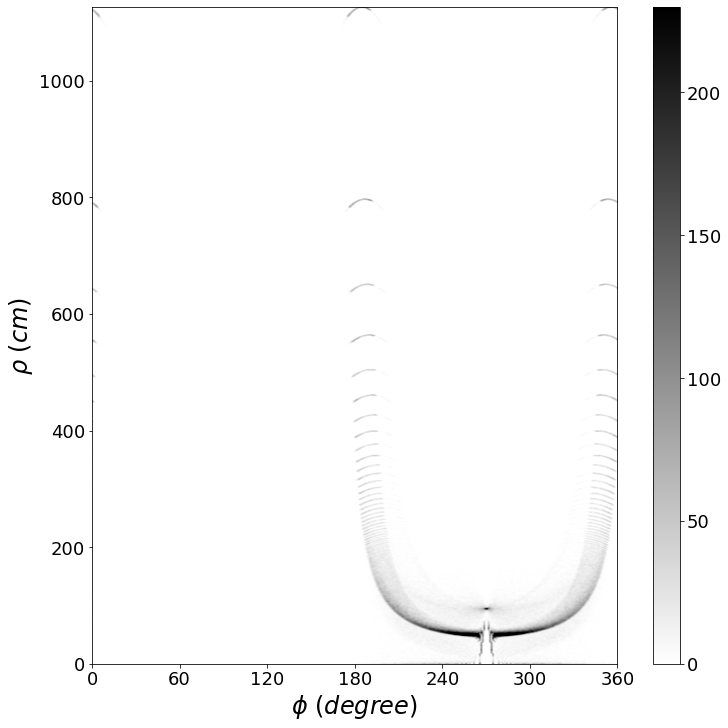

In [104]:
start_time = time.time()

DF = df_kn
NX = nx_kn
NY = ny_kn
Vmax = df_kn['N'].max()

rearranged_img_kn = rearrange(DF,NX,NY,Vmax)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Rearranged Klein-Nishina 300keV

Processing time: 47.01760196685791 s


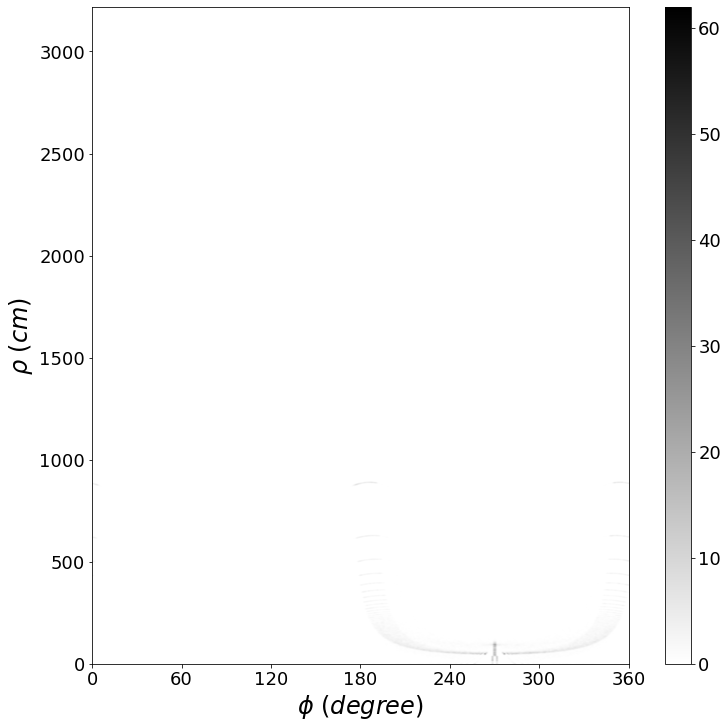

In [125]:
start_time = time.time()

DF = df_kn_300
NX = nx_kn_300
NY = ny_kn_300
Vmax = df_kn_300['N'].max()

rearranged_img_kn_300 = rearrange(DF,NX,NY,Vmax)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 60.189741373062134 s


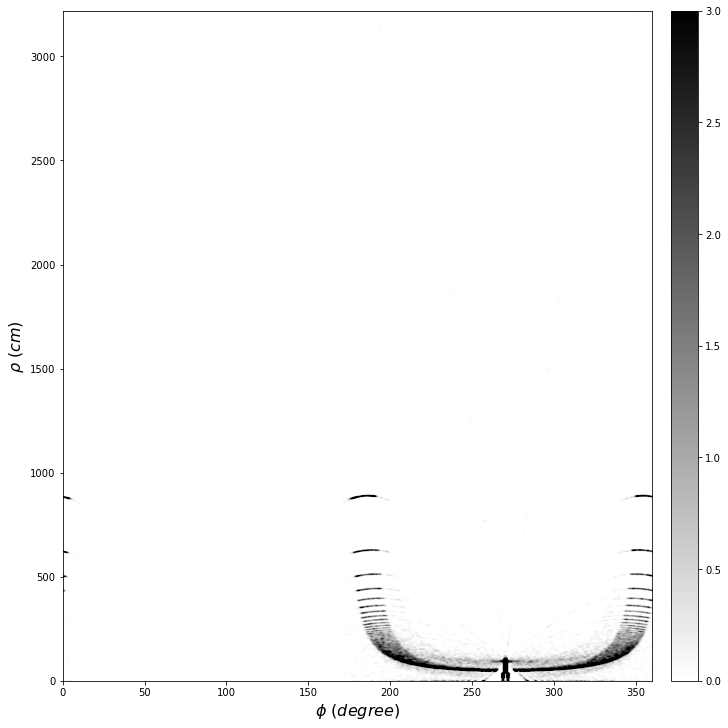

In [228]:
start_time = time.time()

DF = df_kn_300
NX = nx_kn_300
NY = ny_kn_300
Vmax = df_kn_300['N'].max()

rearranged_img_kn_300 = rearrange(DF,NX,NY,3)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 5.528406143188477 s


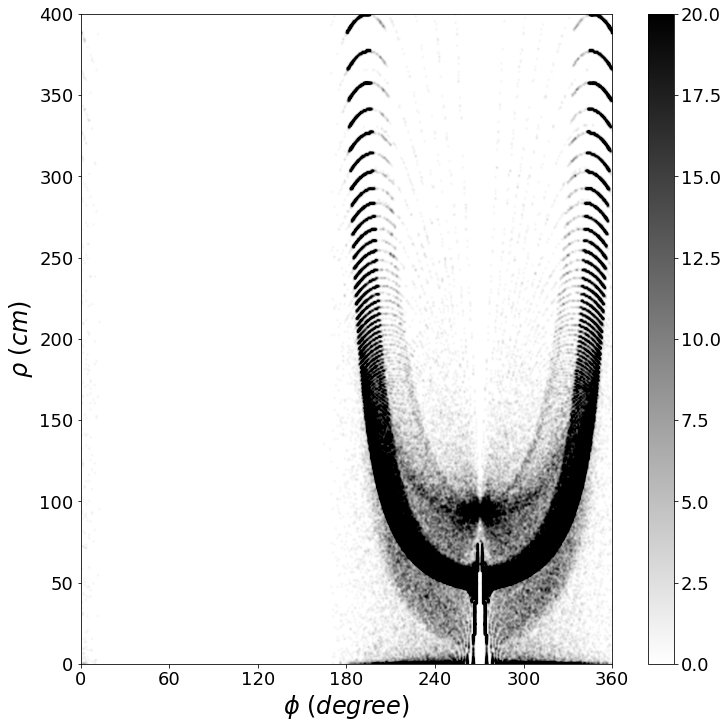

In [127]:
start_time = time.time()

DF = df_kn_300_clipped
NX = nx_kn_300
NY = Ny_kn_300
Vmax = df_kn_300['N'].max()

rearranged_img_kn_300 = rearrange(DF,NX,NY,20)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Rearranged Klein-Nishina wtih Rayleigh Scattering

Processing time: 16.792051553726196 s


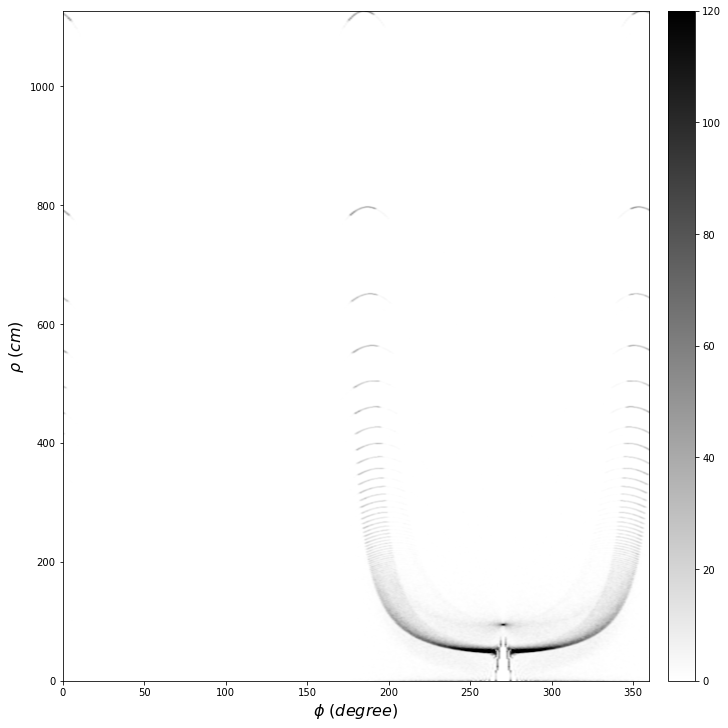

In [7]:
start_time = time.time()

DF = df_kn_rayleigh
NX = nx_kn_rayleigh
NY = ny_kn_rayleigh
Vmax = df_kn_rayleigh['N'].max()

rearranged_img_kn_rayleigh = rearrange(DF,NX,NY,Vmax)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

# Interpolate for continuous $\rho$

In [129]:
start_time = time.time()

def interp_rho(array,Vmax):
    array_copy = array.copy()/1000000 # divide by 1000000 to bring values near zero
    df = pd.DataFrame(array_copy.T)
    # Find index of max.value
    max_idx = array.argmax()
    idx = unravel_index(max_idx,array.shape)
    # Get index where all elements is zero
    zero_slice = df[(df.values == 0).all(axis=1)].index.values.tolist()
    # Set as NaN for missing data
    df.iloc[0:zero_slice[0]] = df.iloc[0:zero_slice[0]].replace(0,np.nan)
    df.iloc[zero_slice[-1]+1:idx[1]-55] = df.iloc[zero_slice[-1]+1:idx[1]-55].replace(0,np.nan)
    df.iloc[idx[1]+40:360] = df.iloc[idx[1]+40:360].replace(0,np.nan)
    # Transpose to interpolate along $\rho$
    Df = df.T.interpolate(method='spline',order=2)
    Df = Df.fillna(Df.mean())
    Df = Df*1000000
    # Convert back to numpy.ndarray
    arr = Df.to_numpy()
    arr[arr<0] = 0
    
    fig, ax = plt.subplots(figsize=(10,10),constrained_layout=True)
    im = ax.imshow(arr, origin='lower', interpolation='bicubic', aspect='auto',\
                       extent=[0, arr.shape[1], 0, arr.shape[0]],\
                       vmin = 0, vmax = Vmax,cmap='binary')
    fig.colorbar(im,ax=ax,aspect=25)
    plt.xlabel(r"$\phi$ ($degree$)",fontsize=24)
    plt.ylabel(r"$\rho$ ($cm$)",fontsize=24)
    
    return im.get_array()

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


### Interpolated rearranged Klein-Nishina

Processing time: 0.2554919719696045 s


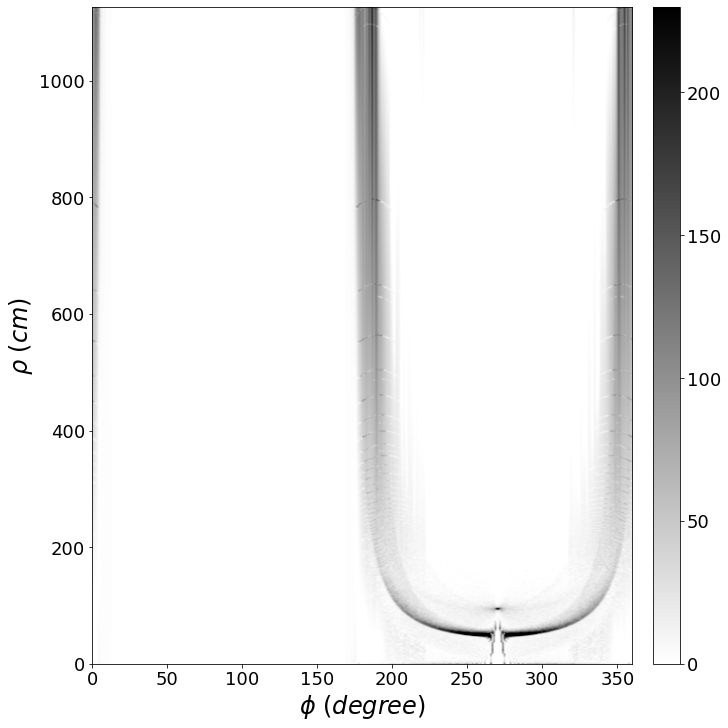

In [120]:
start_time = time.time()

rearr_img_kn = interp_rho(rearranged_img_kn,Vmax)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Interpolated rearranged Klein-Nishina 300keV

In [128]:
start_time = time.time()

rearr_img_kn = interp_rho(rearranged_img_kn_300,Vmax)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

error: (m>k) failed for hidden m: fpcurf0:m=2

In [ ]:
method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'forward' instead.

### Interpolated rearranged Klein-Nishina

Processing time: 0.3010673522949219 s


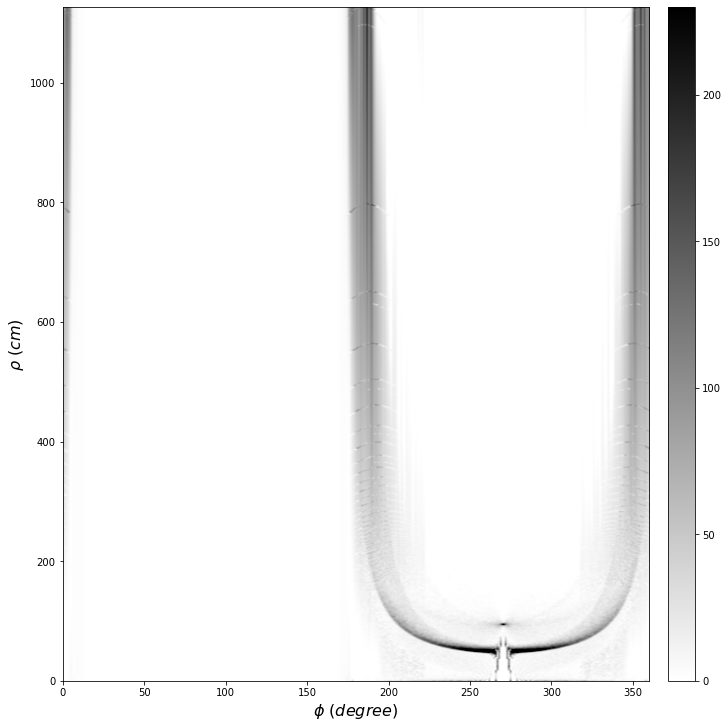

In [199]:
start_time = time.time()

rearr_img_kn = interp_rho(rearranged_img_kn,Vmax)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Interpolated rearranged Klein-Nishina with Rayleigh Scattering

Processing time: 0.28034472465515137 s


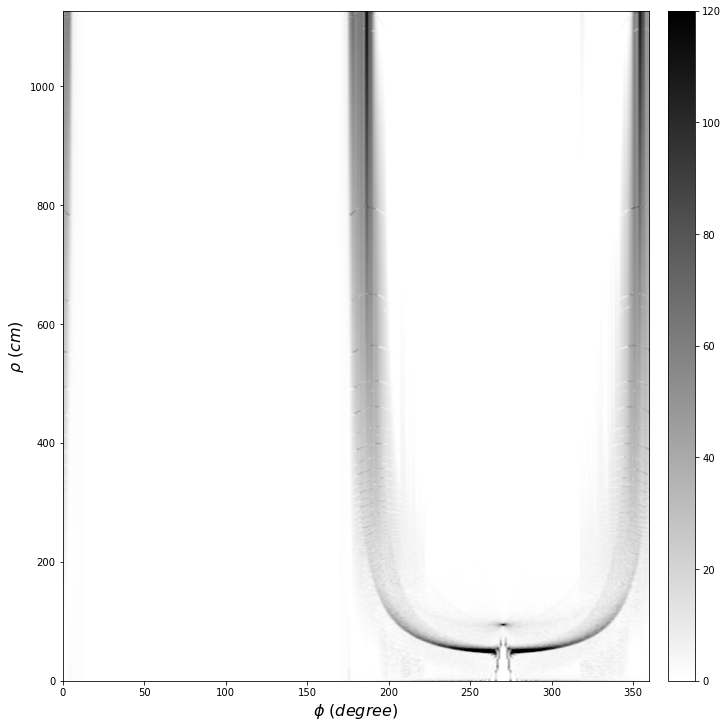

In [9]:
start_time = time.time()

rearr_img_kn_rayleigh = interp_rho(rearranged_img_kn_rayleigh,Vmax)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

# Partial discrete derivation and product with $\rho$ (element-wise)

In [189]:
start_time = time.time()

def partial(df,NX,NY):
    
    Vmax = df['N'].max()
    array = rearrange(df,NX,NY,Vmax)
    plt.close()
#     array = interp_rho(arr,Vmax)
#     plt.close()
    h = 1
    result = [[] for i in range(NX)]
    for j in range(NX):
        for k in range(NY-1):
            # forward difference for first boundary
            if k == 0:
                diff_f = (array.T[j,k+1]-array.T[j,k])/h
                result[j].append(diff_f)
            # central difference
            diff = (array.T[j,k+1]-array.T[j,k-1])/(2*h)
            result[j].append(diff)
    result = np.asarray(result)
        
    return np.transpose(result)

def product(df,NX,NY):
    
    array = partial(df,NX,NY)
    phi = np.arange(NX)           # along x-axis
    rho = np.arange(NY)           # along y-axis
    X,Y = np.meshgrid(phi,rho)    # row x column : rho x phi
    prod = array.copy()
    for i in range(NY):
        prod[i] = prod[i]*Y[i]    # multiply element-wise for each phi
        # prod = prod[i]*Y              # alternative
        
    return prod

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0009996891021728516 s


# Hilbert transform on Fourier domain

In [11]:
start_time = time.time()

def hilbert_scipy(df,NX,NY):
    
    array = product(df,NX,NY)
    transform = []                                   # placeholder for each phi
    for i in range(array.shape[1]):
        result = hilbert(array.T[i])
        transform.append(result)

    return np.asarray(transform)

def hilbert_m(array,NX,NY):
    u = array.T
    Hilbert = []
    for i in range(len(u)):
        v = fft(u[i])
        freq = np.fft.fftfreq(len(u[i]))
        signum = -1j*np.sign(freq)
        w = signum*v
        Hilbert.append(w)
        
    return np.asarray(Hilbert)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


In [ ]:
u = prod.T
Hilbert = []
for i in range(len(u)):
    v = fft(u[i])
    freq = np.fftfreq(len(u[i]))
    signum = -1*j*np.sign(freq)
    w = signum*v
    Hilbert.append(w)

# Image domain f($\rho$,$\phi$) : f(x,y)

In [12]:
start_time = time.time()

def fbp(array,diameter,k,resolution):
    
    """ 
        r = rho\cos(\theta-\phi)  
        r = sqrt{x^2+t^2}
        r\cos(\theta-\phi) = x\cos\phi+y\sin\phi
        -----> rho = (x^2+y^2) / (x\cos\phi+y\sin\phi)
    """

    rho = np.arange(array.shape[1])
    phi = np.arange(array.shape[0])
    
    radius = diameter/2 
    x = np.linspace(-radius,radius,resolution)  
    y = np.linspace(radius-k,-(radius+k),resolution)    # source points at negative y
    
    nxy = [[] for j in range(len(x))]
    for j in range(len(x)):
        for k in range(len(y)):
            result = 0
            for i in range(len(phi)):
                if x[j]*np.cos(phi[i]*(np.pi)/180)+y[k]*np.sin(phi[i]*(np.pi)/180) == 0:
                    weight = np.nan
                    rho_cartesian = np.nan
                else:
                    weight = 1/(x[j]*np.cos(phi[i]*np.pi/180) + y[k]*np.sin(phi[i]*np.pi/180))
                    rho_cartesian = (x[j]**2+y[k]**2)*weight
                    rho_cartesian = int(np.round(rho_cartesian,0))
                if rho_cartesian in rho:
                    result += array[i,rho_cartesian]/weight
            nxy[j].append(result)

    return np.asarray(nxy)/(2*np.pi)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 0.0 s


# Image Reconstruction

## Source-Detector Geometry

### Klein-Nishina

Processing time: 5974.1678631305695 s


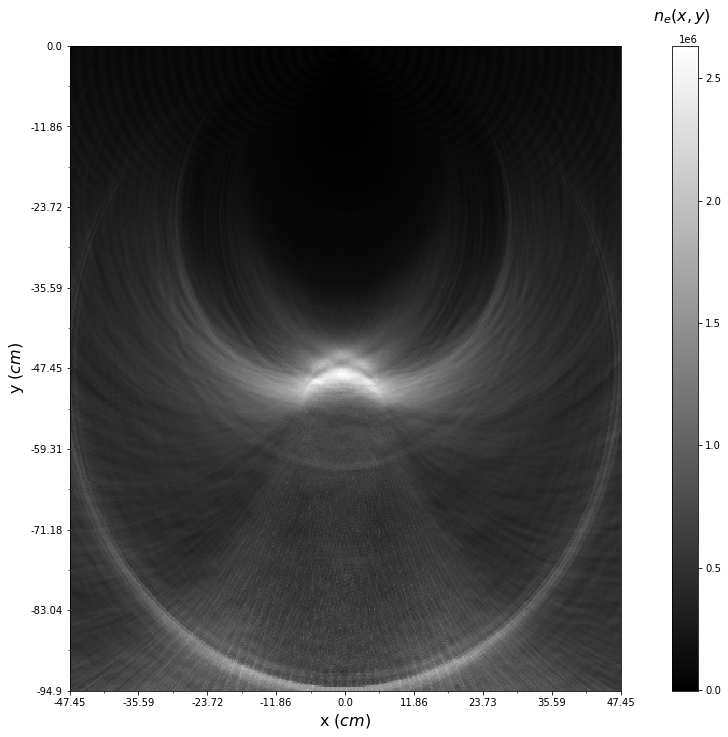

In [195]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

data_kn_setup = hilbert_scipy(df_kn,nx_kn,ny_kn)
diameter = SDD
resolution = 512
k = r
fbp_kn_setup = fbp(np.abs(data_kn_setup),diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_setup = ax.pcolormesh(fbp_kn_setup.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_setup,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina 300 keV

Processing time: 6125.083544015884 s


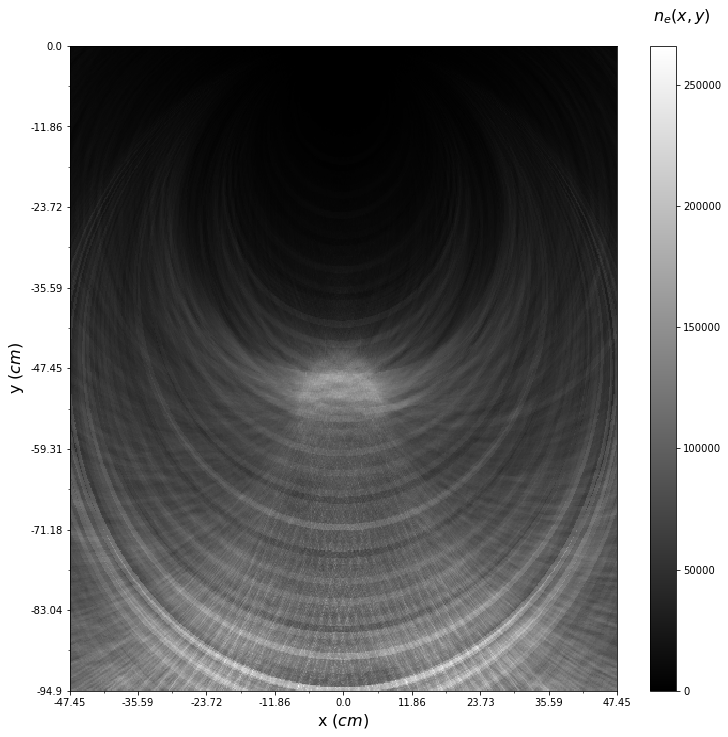

In [191]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

data_kn_300_setup = hilbert_scipy(df_kn_300,nx_kn_300,ny_kn_300)
diameter = SDD
resolution = 512
k = r
fbp_kn_300_setup = fbp(np.abs(data_kn_300_setup),diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_300_setup = ax.pcolormesh(fbp_kn_300_setup.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_300_setup,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 6357.212687015533 s


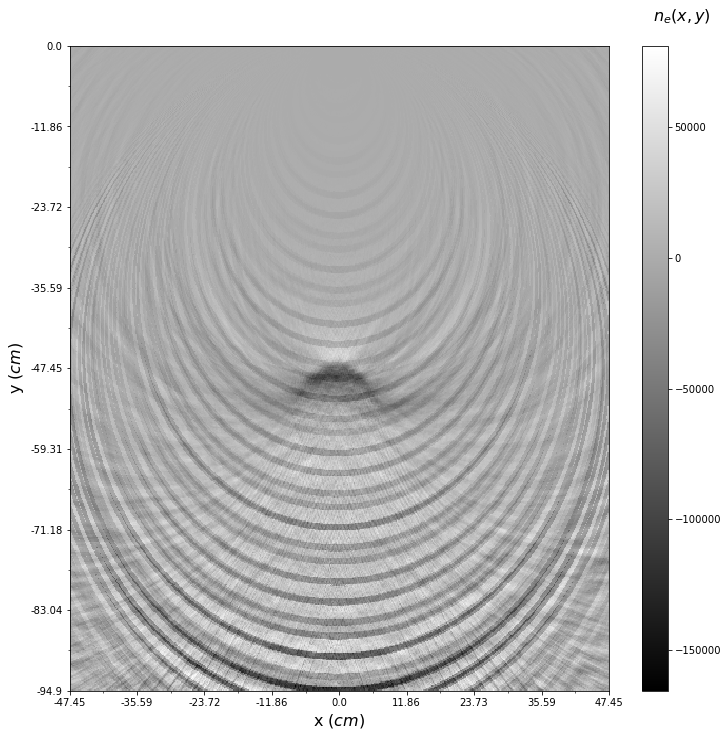

In [192]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

# data_kn_300_setup = hilbert_scipy(df_kn_300,nx_kn_300,ny_kn_300)
# diameter = SDD
# resolution = 512
# k = r
fbp_kn_300_setup2 = fbp(data_kn_300_setup,diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_300_setup2 = ax.pcolormesh(fbp_kn_300_setup2.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_300_setup2,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina with Rayleigh Scattering

Processing time: 5584.451462507248 s


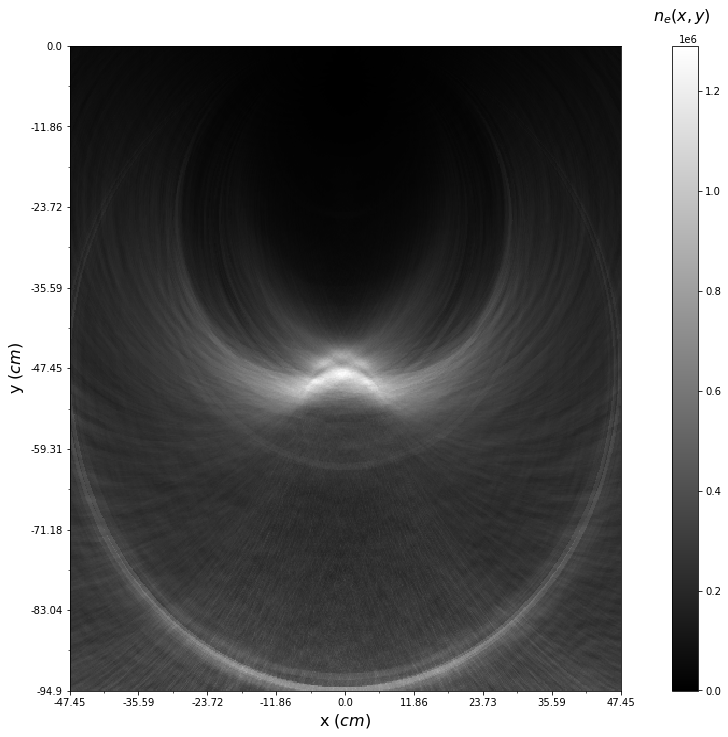

In [13]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

data_kn_rayleigh_setup = hilbert_scipy(df_kn_rayleigh,nx_kn_rayleigh,ny_kn_rayleigh)
diameter = SDD
resolution = 512
k = r
fbp_kn_rayleigh_setup = fbp(np.abs(data_kn_rayleigh_setup),diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_rayleigh_setup = ax.pcolormesh(fbp_kn_rayleigh_setup.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_rayleigh_setup,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

## CTP401 Module of Catphan 504 phantom

### Klein-Nishina

Processing time: 5723.685238838196 s


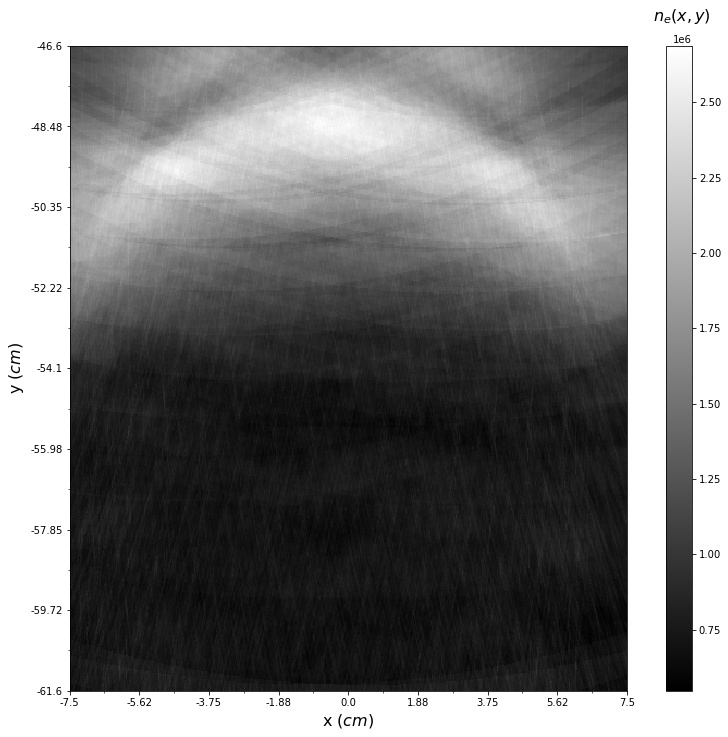

In [196]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

data_kn_phantom = hilbert_scipy(df_kn,nx_kn,ny_kn)
diameter = D
resolution = 512
k = SID
fbp_kn_phantom = fbp(np.abs(data_kn_phantom),diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_phantom = ax.pcolormesh(fbp_kn_phantom.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_phantom,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina 300 keV

Processing time: 3808.1401653289795 s


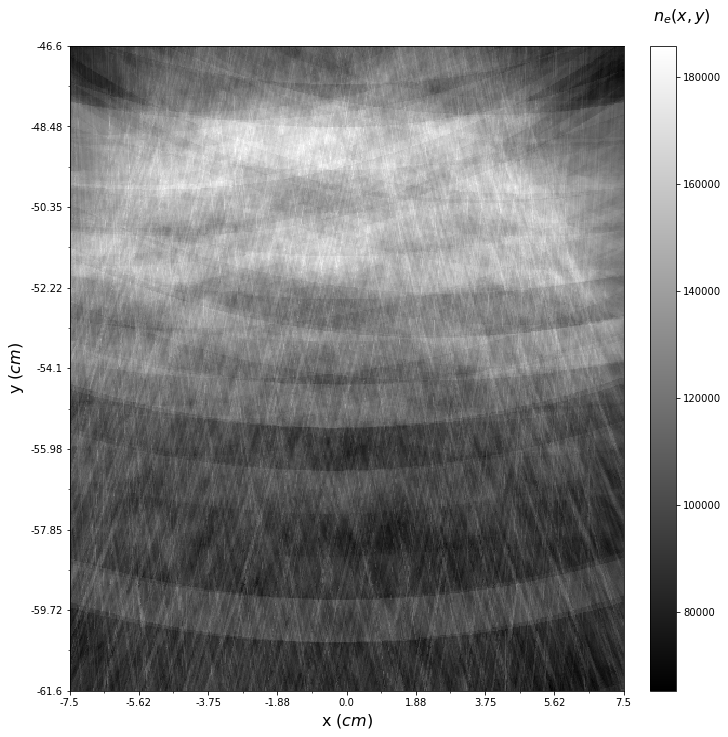

In [193]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

data_kn_300_phantom = hilbert_scipy(df_kn_300,nx_kn_300,ny_kn_300)
diameter = D
resolution = 512
k = SID
fbp_kn_300_phantom = fbp(np.abs(data_kn_300_phantom),diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_300_phantom = ax.pcolormesh(fbp_kn_300_phantom.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_300_phantom,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

### Klein-Nishina with Rayleigh Scatterirng

Processing time: 6331.035660743713 s


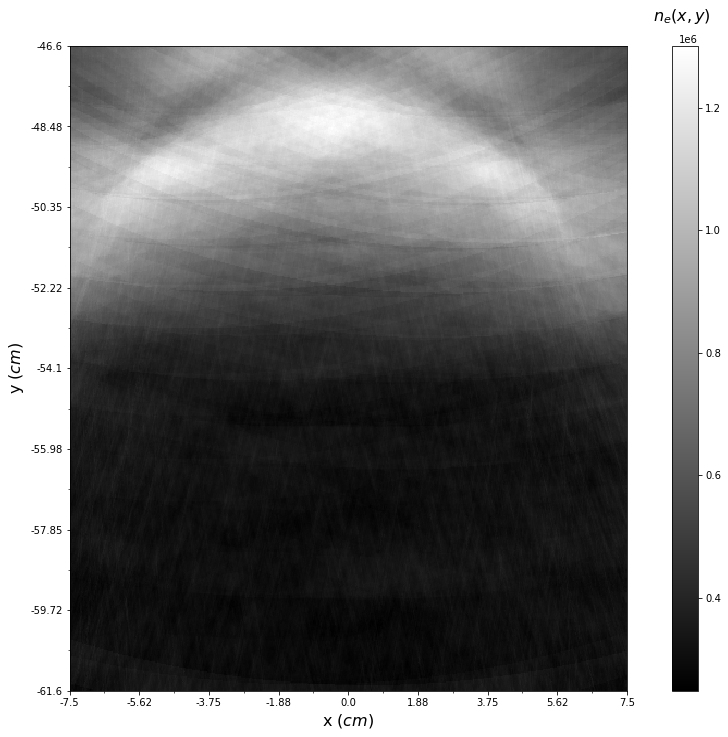

In [40]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

data_kn_rayleigh_phantom = hilbert_scipy(df_kn_rayleigh,nx_kn_rayleigh,ny_kn_rayleigh)
diameter = D
resolution = 512
k = SID
fbp_kn_rayleigh_phantom = fbp(np.abs(data_kn_rayleigh_phantom),diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_rayleigh_phantom = ax.pcolormesh(fbp_kn_rayleigh_phantom.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_rayleigh_phantom,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)
    
# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')

Processing time: 254.97275400161743 s


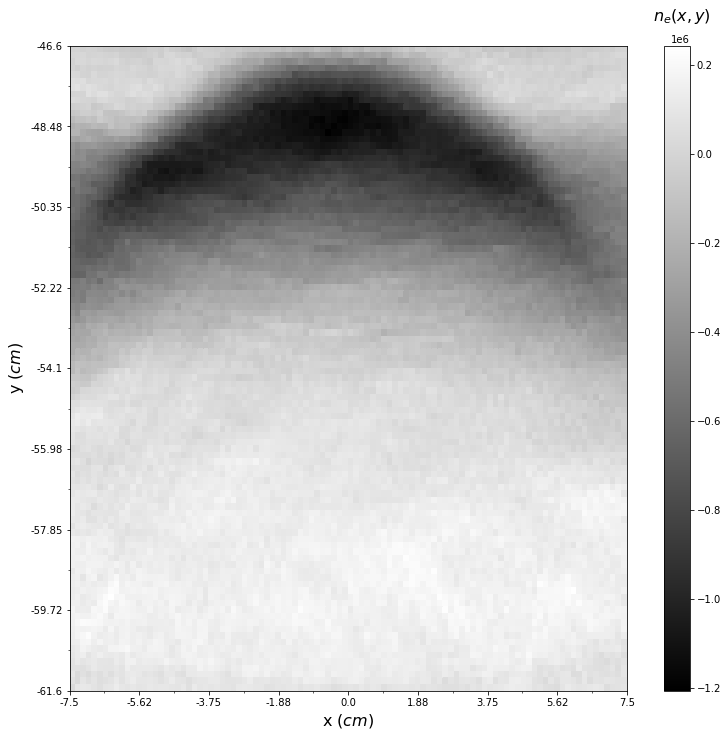

In [41]:
start_time = time.time()

###  fbp_final(array,diameter,k,resolution)
##

data_kn_rayleigh_phantom = hilbert_scipy(df_kn_rayleigh,nx_kn_rayleigh,ny_kn_rayleigh)
diameter = D
resolution = 100
k = SID
fbp_kn_rayleigh_phantom = fbp(data_kn_rayleigh_phantom,diameter,k,resolution)

fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
fig.gca().invert_yaxis()
pcm_kn_rayleigh_phantom = ax.pcolormesh(fbp_kn_rayleigh_phantom.T,cmap='binary_r')
clb = fig.colorbar(pcm_kn_rayleigh_phantom,ax=ax,aspect=25)
clb.set_label(r"$n_e(x,y)$", labelpad=-39, y=1.06, rotation=0,fontsize=16)

# Image ticks and labels
step = resolution/8
xticks = np.arange(0, resolution+step, step)
yticks = np.arange(0, resolution+step, step)
xlabels = np.linspace(-diameter/2, diameter/2, len(xticks))
ylabels = np.linspace(diameter/2-k, -(diameter/2+k), len(yticks))

# Major ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)
    
# Labels for major ticks
ax.set_xticklabels(np.round(xlabels,2))
ax.set_yticklabels(np.round(ylabels,2))

# Minor ticks
ax.set_xticks(np.arange(step/2, resolution, step), minor=True)
ax.set_yticks(np.arange(step/2, resolution, step), minor=True)

plt.xlabel(r"x ($cm$)",fontsize=16)
plt.ylabel(r"y ($cm$)",fontsize=16)

end_time = time.time()
print('Processing time: {}'.format(end_time - start_time), 's')